In [141]:
import kagglehub
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# PARTE 2 - 1 Baixe os dados disponibilizados na plataforma Kaggle sobre dados sócio-econômicos 
# e de saúde que determinam o índice de desenvolvimento de um país. 
# Esses dados estão disponibilizados através do link: 
# https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")
print(path)
# Carregar os dados
df = pd.read_csv(path+"\\Country-data.csv", sep = ",")

# PARTE 2 - 2 Quantos países existem no dataset?
print('Qtde Países no dataset: ', df['country'].count())

C:\Users\alan echer\.cache\kagglehub\datasets\rohan0301\unsupervised-learning-on-country-data\versions\2
Qtde Países no dataset:  167


In [142]:
# Visualizando as primeiras linhas e informações básicas
print("Primeiras linhas do dataset:")
print(df.head())
print("\nInformações do dataset:")
print(df.info())
print("\nEstatísticas descritivas:")
print(df.describe())
print("\nValores nulos por coluna:")
print(df.isnull().sum())

Primeiras linhas do dataset:
               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort

In [143]:
# Remover colunas não numéricas, caso existam (ex: nomes dos países)
X = df.select_dtypes(include=[np.number])

In [ ]:
# PARTE 2 - 3 Os dados possuem variação alta, presença de outliers e diferença 
# de escala entre variáveis
# TRATAMENTO DE OUTLIERS - Foi preciso aplicar logaritmos nas colunas que 
# possuiam outliers:
# 'child_mort', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp', 
# 'exports', 'imports'
# verificando se o valor era negativo antes de aplicar o logaritmo

In [145]:
# Tratar outliers
cols_to_log = ['child_mort', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp', 'exports', 'imports']
for col in cols_to_log:
    min_val = X[col].min()
    if min_val <= 0:
        X[col] = np.log1p(X[col] + abs(min_val) + 1)
    else:
        X[col] = np.log1p(X[col])

In [ ]:
# PARTE 2 - 3 Os dados possuem variação alta, presença de outliers e diferença de escala entre variáveis
# NORMALIZAÇÃO - Foi preciso normalizar os dados para reduzir a amplitude dos valores
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [147]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

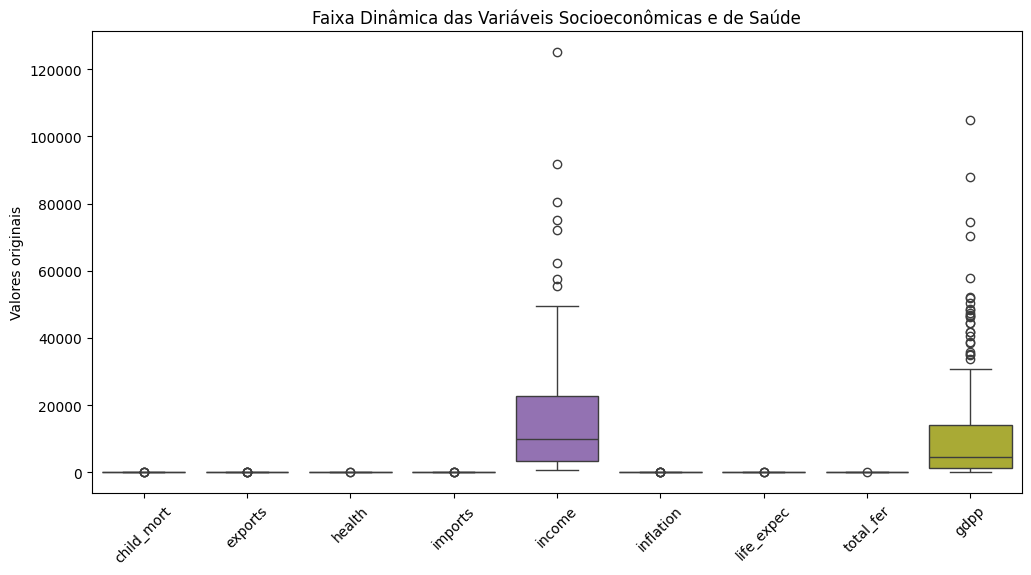

In [161]:
# --- Boxplot para ver a faixa dinâmica ---
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.title("Faixa Dinâmica das Variáveis Socioeconômicas e de Saúde")
plt.xticks(rotation=45)
plt.ylabel("Valores originais")
plt.show()

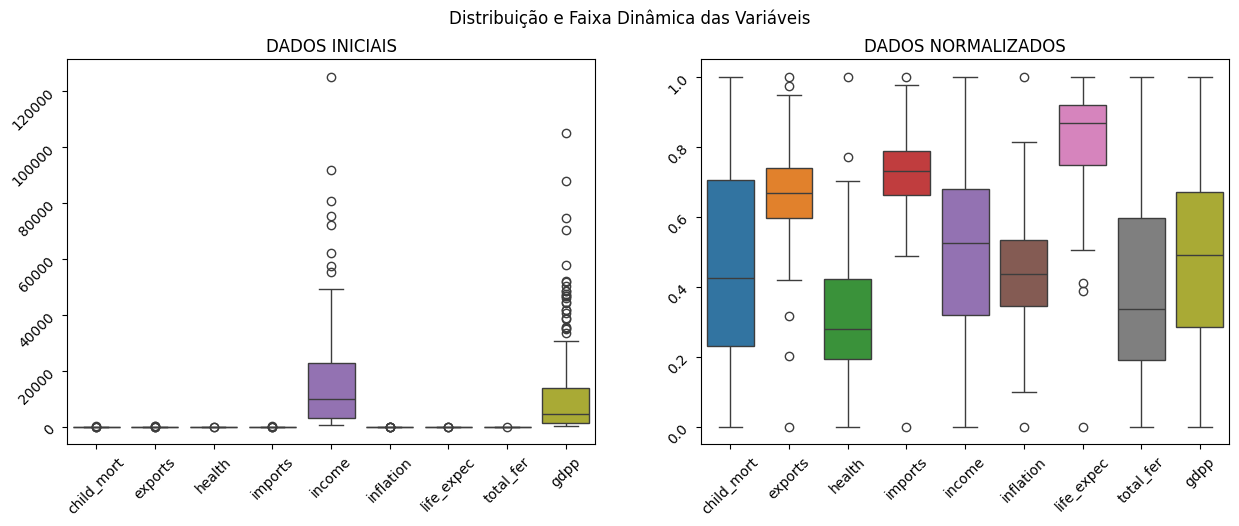

In [148]:
f, ax = plt.subplots(1, 2, figsize=(15,5))

sns.boxplot(data=df.drop('country', axis=1), ax=ax[0])
ax[0].set_title('DADOS INICIAIS')
ax[0].tick_params(labelrotation=45)

sns.boxplot(data=X_scaled_df, ax=ax[1])
ax[1].set_title('DADOS NORMALIZADOS')
ax[1].tick_params(labelrotation=45)

plt.suptitle('Distribuição e Faixa Dinâmica das Variáveis')
plt.show()

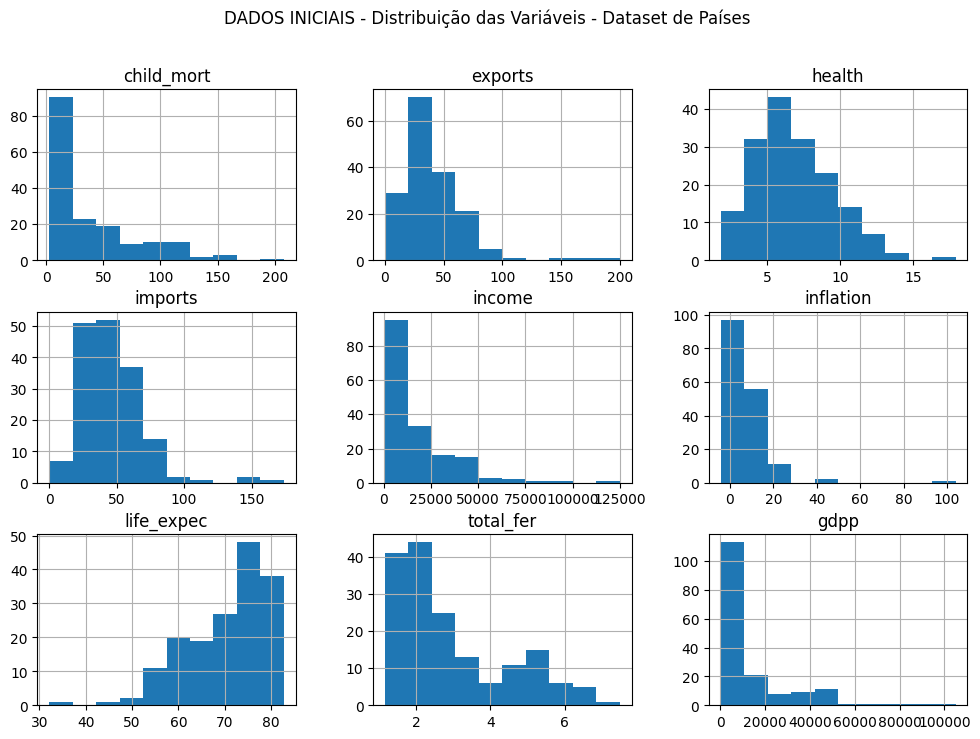

In [149]:
df.drop('country', axis=1).hist(figsize=(12,8))
plt.suptitle("DADOS INICIAIS - Distribuição das Variáveis - Dataset de Países")
plt.show()

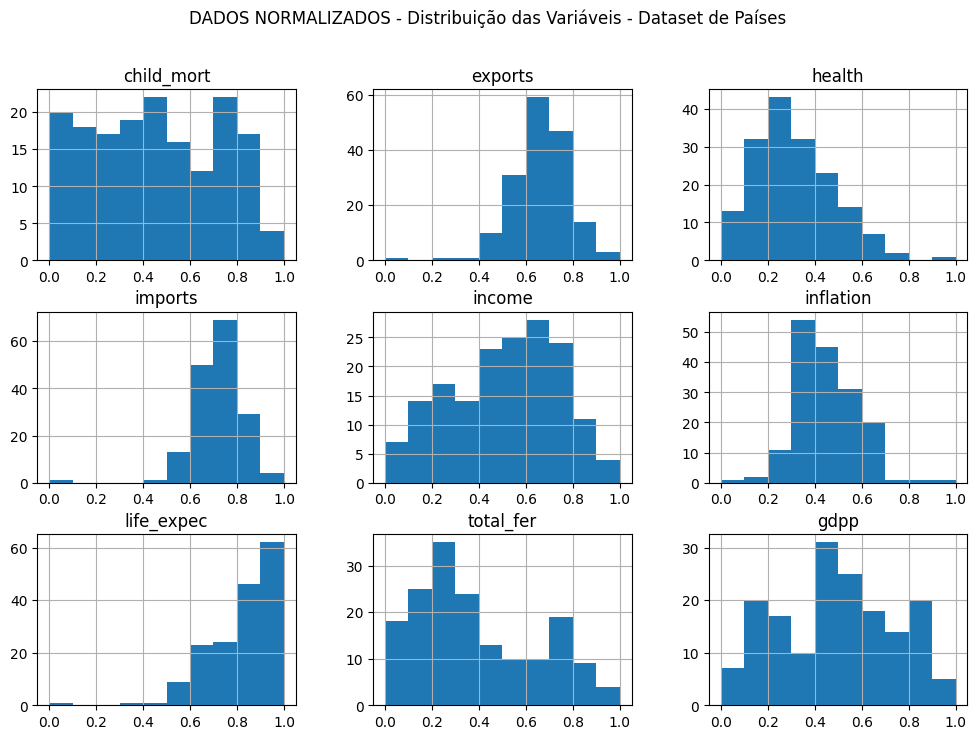

In [150]:
X_scaled_df.hist(figsize=(12,8))
plt.suptitle("DADOS NORMALIZADOS - Distribuição das Variáveis - Dataset de Países")
plt.show()

In [151]:
number_of_clusters = 3
random_seed = 42

hierarquical = AgglomerativeClustering(
    n_clusters=number_of_clusters, 
    linkage='ward', 
    metric='euclidean'
)

X_scaled_df['cluster_hierarquical'] = hierarquical.fit_predict(X_scaled)
X_scaled_df['cluster_hierarquical']


0      0
1      1
2      1
3      0
4      1
      ..
162    0
163    1
164    0
165    0
166    0
Name: cluster_hierarquical, Length: 167, dtype: int64

In [152]:
kmeans = KMeans(
    n_clusters=number_of_clusters,
    random_state=random_seed
)

X_scaled_df['cluster_kmeans'] = kmeans.fit_predict(X_scaled)
X_scaled_df['cluster_kmeans']

0      2
1      0
2      0
3      2
4      1
      ..
162    0
163    0
164    0
165    2
166    2
Name: cluster_kmeans, Length: 167, dtype: int32

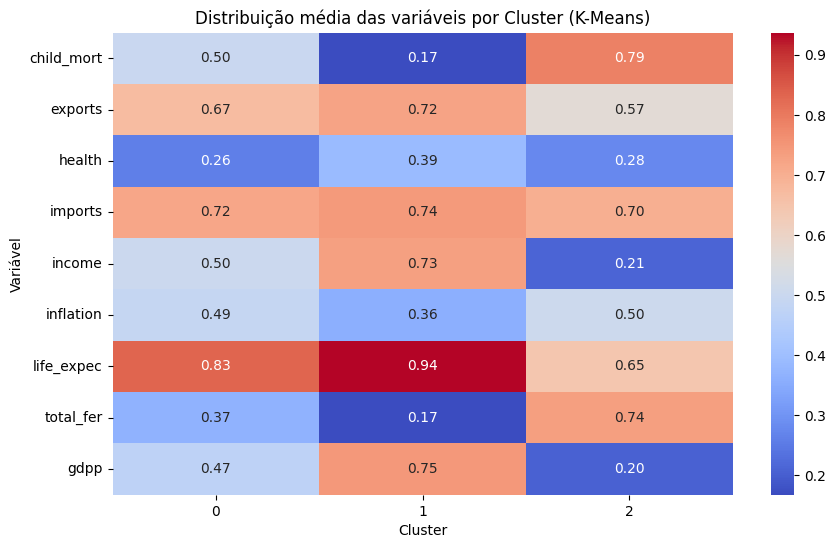

In [153]:
# Médias por cluster (distribuição central das dimensões)
means = X_scaled_df.drop('cluster_hierarquical', axis=1).groupby('cluster_kmeans').mean().T
plt.figure(figsize=(10,6))
sns.heatmap(means, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Distribuição média das variáveis por Cluster (K-Means)")
plt.ylabel("Variável")
plt.xlabel("Cluster")
plt.show()

In [154]:
# Obter os centróides
centroids = kmeans.cluster_centers_

# Calcular a distância de cada ponto ao centróide do seu cluster
distances = []
for i, row in enumerate(X_scaled):
    cluster_label = X_scaled_df.loc[i, 'cluster_kmeans']
    centroid = centroids[cluster_label]
    distance = np.linalg.norm(row - centroid)
    distances.append(distance)

X_scaled_df['distance_to_centroid'] = distances

X_scaled_df['country'] = df['country']
# Encontrar o país mais representativo de cada cluster
representative_countries = X_scaled_df.loc[
    X_scaled_df.groupby('cluster_kmeans')['distance_to_centroid'].idxmin(),
    ['country', 'cluster_kmeans', 'distance_to_centroid']]
X_scaled_df = X_scaled_df.drop('country', axis=1)

print("Países que melhor representam cada cluster:\n")
print(representative_countries)

Países que melhor representam cada cluster:

      country  cluster_kmeans  distance_to_centroid
118  Paraguay               0              0.128643
41    Croatia               1              0.145154
147  Tanzania               2              0.098071


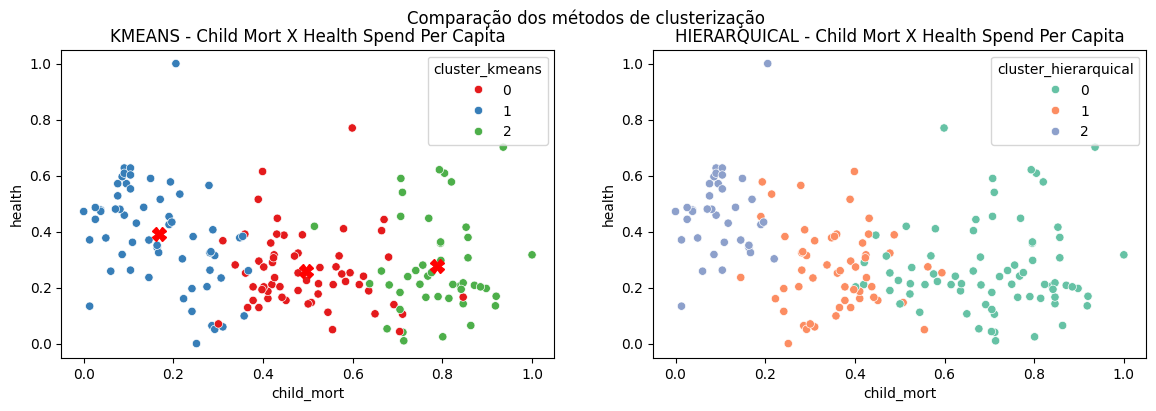

In [155]:
f, ax = plt.subplots(1, 2, figsize=(14,4))

x_column = 'child_mort'
y_column = 'health'
pos_for_x_column = 0
pos_for_y_column = 2

sns.scatterplot(data=X_scaled_df, x=x_column, y=y_column, hue=X_scaled_df['cluster_kmeans'], palette='Set1', ax=ax[0])
ax[0].set_title('KMEANS - Child Mort X Health Spend Per Capita')
ax[0].plot(
    [x[pos_for_x_column] for x in kmeans.cluster_centers_],
    [x[pos_for_y_column] for x in kmeans.cluster_centers_],
    'X',
    color='red',
    markersize=10,
)

sns.scatterplot(data=X_scaled_df, x=x_column, y=y_column, hue=X_scaled_df['cluster_hierarquical'], palette='Set2', ax=ax[1])
ax[1].set_title('HIERARQUICAL - Child Mort X Health Spend Per Capita')

plt.suptitle('Comparação dos métodos de clusterização')
plt.show()


In [156]:
print("\nDistribuição dos clusters (K-Means):")
print(X_scaled_df['cluster_kmeans'].value_counts())

print("\nDistribuição dos clusters (Hierárquico):")
print(X_scaled_df['cluster_hierarquical'].value_counts())


Distribuição dos clusters (K-Means):
cluster_kmeans
0    61
1    61
2    45
Name: count, dtype: int64

Distribuição dos clusters (Hierárquico):
cluster_hierarquical
0    75
1    55
2    37
Name: count, dtype: int64


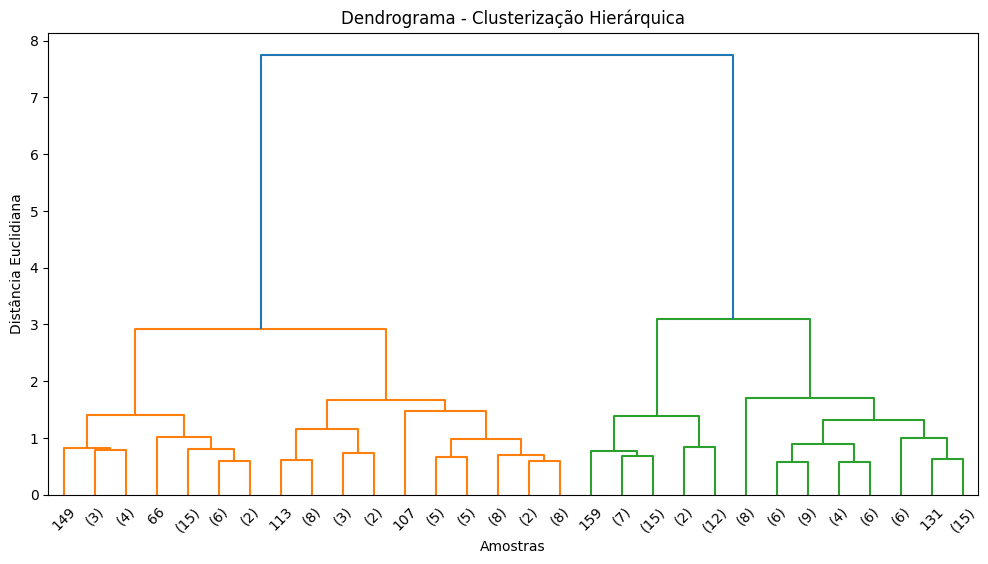

In [157]:
# O AgglomerativeClustering não gera dendrograma diretamente, então usamos linkage
Z = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=45., leaf_font_size=10.)
plt.title("Dendrograma - Clusterização Hierárquica")
plt.xlabel("Amostras")
plt.ylabel("Distância Euclidiana")
plt.show()

In [158]:
pd.crosstab(X_scaled_df['cluster_kmeans'], X_scaled_df['cluster_hierarquical'])

cluster_hierarquical,0,1,2
cluster_kmeans,,,
0,30,31,0
1,0,24,37
2,45,0,0
